In [104]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [105]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()


In [106]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2874

In [107]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()  

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']

In [108]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [109]:
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df

In [110]:
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)

In [111]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()


limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query

In [112]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']

Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)

DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()

dupe_dupe = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')

In [113]:
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,2870,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"March 25, 2019","April 8, 2022",University of Pittsburgh,OTHER,,Recruiting,Recruiting,Pittsburgh,United States,112.0,"Adult, Older Adult",All
2870,2871,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
2871,2872,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
2872,2873,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female


In [114]:
#Begin my section of coding
df_timegeo = df_final[["NCTId","BriefTitle","StartDate","CompletionDate","LocationStatus","LocationCity","LocationCountry"]]
df_timegeo

,NCTId,BriefTitle,StartDate,CompletionDate,LocationStatus,LocationCity,LocationCountry
0,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,"April 15, 2020","October 15, 2020","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital..."
1,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,"May 5, 2020",May 2021,Recruiting,Orléans,France
2,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,September 2020,June 2022,,Nashville,United States
3,NCT04412265,Frailty in Elderly Patients With COVID-19,"March 1, 2020","March 1, 2021",Recruiting,Monza,Italy
4,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,"May 15, 2020","September 30, 2020",Recruiting,Monza,Italy
...,...,...,...,...,...,...,...
2869,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,"March 25, 2019","April 8, 2022",Recruiting,Pittsburgh,United States
2870,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,"May 20, 2019",February 2022,"Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel"
2871,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,"March 1, 2020","June 30, 2023",Recruiting,Lusaka,Zambia
2872,NCT03922334,Navigating New Motherhood 2,"January 21, 2020",December 2024,Recruiting,Chicago,United States


Text(0.5, 1.0, 'Countries with largest #trials')

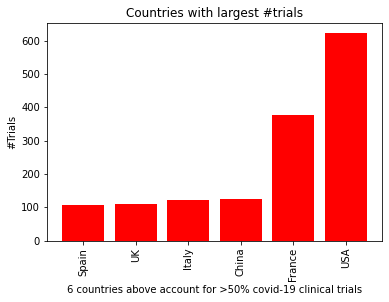

In [115]:
#Cleanup DataFrame countries to just be one word
new_df = pd.DataFrame(df_timegeo.LocationCountry.str.split(',').tolist(),index=df_timegeo.NCTId).stack()

#Make list of unique countries to calculate #unique countries with trials
unique_countries = []
for i in new_df:
    if i not in unique_countries:
        unique_countries.append(i)

#Tabulate #trials in these 6 main countries impact
USA = new_df[new_df == 'United States']
UK = new_df[new_df == 'United Kingdom']
China = new_df[new_df == 'China']
Italy = new_df[new_df == 'Italy']
France = new_df[new_df == 'France']
Spain = new_df[new_df == 'Spain']

contr = len(USA) + len(UK) + len(China) + len(Italy) + len(France) + len(Spain)

#Create DataFrame of the key countries with #trials
chart_data = pd.DataFrame({"Top Countries": ["USA","UK","France","China","Italy","Spain"],"#Trials": [len(USA),
                          len(UK),len(France),len(China),len(Italy),len(Spain)]})
chart_data = chart_data.sort_values("#Trials")

#Plot chart with countries
plt.bar(chart_data["Top Countries"], chart_data["#Trials"], color='red')
plt.xticks(rotation=90)
plt.xlabel("6 countries above account for >50% covid-19 clinical trials")
plt.ylabel("#Trials")
plt.title("Countries with largest #trials")

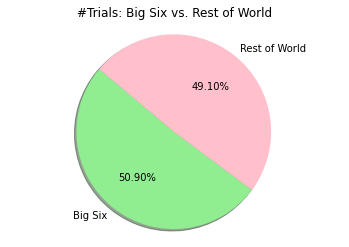

In [126]:
#Pie Chart for trials between the Big Six and Rest of the World
labels = ["Big Six", "Rest of World"]
trials = [1463, 1411]
colors = ["lightgreen","pink"]
plt.pie(trials, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("#Trials: Big Six vs. Rest of World")
plt.show()

/Users/Varun/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


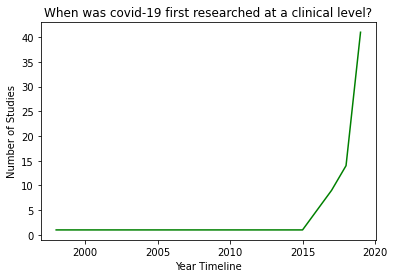

In [160]:
#Isolating year of study for dataframes
df_timegeo1 = df_timegeo[["NCTId","BriefTitle","StartDate","LocationCountry"]]
df_timegeo1['year']=pd.DatetimeIndex(df_timegeo1['StartDate']).year

#How many unique years are there? (11)
df_timegeo1.year.nunique(dropna=True)

#Isolate and display the actual unique years
timegeo = df_timegeo1['year'].unique()
timegeo

#How many times does each unique year appear in timegeo2?
year_unique = df_timegeo1.groupby(['year']).count()
year_unique = year_unique[["StartDate"]]
year_unique

#Create line chart based on year_unique results for pre covid-19
test_years = [1998, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019]
year_count = [1,1,1,1,1,5,9,14,41]

Timeline = plt.plot(test_years, year_count, color="green", label="test years")
plt.xlabel('Year Timeline')
plt.ylabel('Number of Trials through 2019')
plt.title('When was covid-19 first researched at a clinical level?')
plt.show()

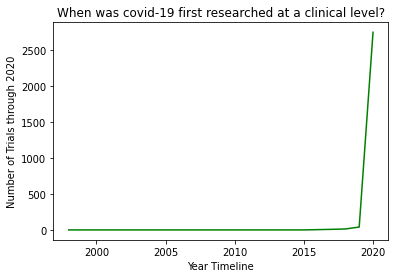

In [161]:
#Create line chart based on year_unique results for post covid-19
test_years = [1998, 2011, 2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020]
year_count = [1,1,1,1,1,5,9,14,41, 2744]

Timeline = plt.plot(test_years, year_count, color="green", label="test years")
plt.xlabel('Year Timeline')
plt.ylabel('Number of Trials through 2020')
plt.title('When was covid-19 first researched at a clinical level?')
plt.show()

In [ ]:
#The first covid-19 related clinical trial was in 1998!!
#The number of studies related to covid-19 worldwide exploded from 41 to 2744 in 2020!!
#USA, UK, France, China, Italy, and Spain account for >50% of covid-19 clinical trials

#Given the chance, I want to see budgets for different trials, perhaps a measure of how impactful trial can be.
#Given the chance, I want to see how many trials get advanced to a higher level of study/further trials.
#Given the chance, I want to see 